<a href="https://colab.research.google.com/github/venom1204/QMLHEP/blob/main/task1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cirq

In [2]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit  # For SVG-

In [4]:
 # Define 5 qubits: ancilla + 4 qubits for two pairs (|q1 q2> and |q3 q4>)
qubits = [cirq.LineQubit(i) for i in range(5)]
ancilla, q1, q2, q3, q4 = qubits


In [5]:
# Create the quantum circuit
circuit = cirq.Circuit()


Circuit after Step 1 (Hadamard on q1):
1: ───H───


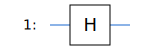

In [6]:
# Step 1: Apply Hadamard gate to the first qubit (q1)
circuit.append(cirq.H(q1))

# Visualize the circuit after Step 1
print("Circuit after Step 1 (Hadamard on q1):")
print(circuit)
display(SVGCircuit(circuit))


Circuit after Step 2 (Rotate q2 by pi/3 around X):
1: ───H────────────

2: ───Rx(0.333π)───


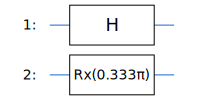

In [7]:
# Step 2: Rotate second qubit by pi/3 around X-axis
circuit.append(cirq.rx(np.pi / 3)(q2))

# Visualize the circuit after Step 2
print("Circuit after Step 2 (Rotate q2 by pi/3 around X):")
print(circuit)
display(SVGCircuit(circuit))


Circuit after Step 3 (Hadamard on q3 and q4):
1: ───H────────────

2: ───Rx(0.333π)───

3: ───H────────────

4: ───H────────────


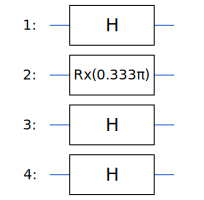

In [8]:
# Step 3: Apply Hadamard gates to third and fourth qubits
circuit.append([cirq.H(q3), cirq.H(q4)])

# Visualize the circuit after Step 3
print("Circuit after Step 3 (Hadamard on q3 and q4):")
print(circuit)
display(SVGCircuit(circuit))

Circuit after Step 4 (SWAP Test with ancilla):
0: ───H────────────@───@───H───
                   │   │
1: ───H────────────×───┼───────
                   │   │
2: ───Rx(0.333π)───┼───×───────
                   │   │
3: ───H────────────×───┼───────
                       │
4: ───H────────────────×───────


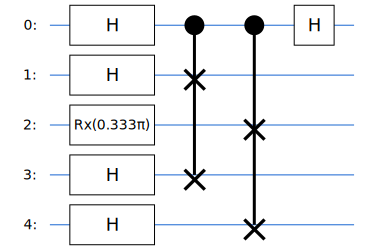

In [9]:
# Step 4: Perform SWAP test between |q1 q2> and |q3 q4>
# Initialize ancilla in superposition
circuit.append(cirq.H(ancilla))

# Controlled-SWAP gates between corresponding qubits of the two pairs
circuit.append([cirq.CSWAP(ancilla, q1, q3), cirq.CSWAP(ancilla, q2, q4)])

# Apply Hadamard on ancilla again after controlled swaps
circuit.append(cirq.H(ancilla))

# Visualize the circuit after Step 4
print("Circuit after Step 4 (SWAP Test with ancilla):")
print(circuit)
display(SVGCircuit(circuit))

Final Circuit:
0: ───H────────────@───@───H───M('swap_test')───
                   │   │
1: ───H────────────×───┼────────────────────────
                   │   │
2: ───Rx(0.333π)───┼───×────────────────────────
                   │   │
3: ───H────────────×───┼────────────────────────
                       │
4: ───H────────────────×────────────────────────


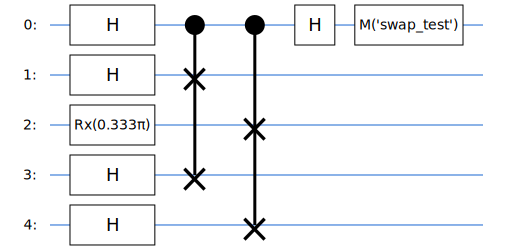

Measurement Outcomes (Ancilla): Counter({0: 776, 1: 248})


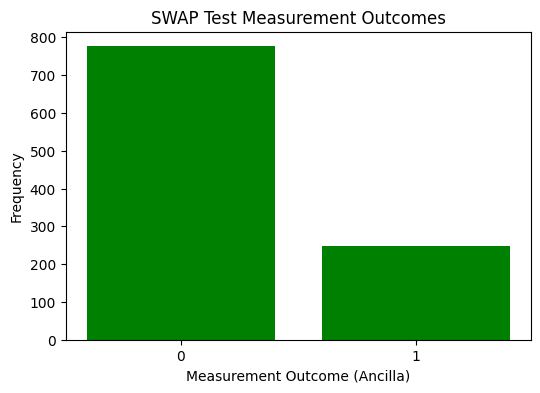

In [10]:
# Step 5: Measure ancilla to complete SWAP test
circuit.append(cirq.measure(ancilla, key='swap_test'))

# Visualize the final circuit
print("Final Circuit:")
print(circuit)
display(SVGCircuit(circuit))

# Simulate the circuit and print measurement outcomes
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1024)
counts = result.histogram(key='swap_test')
print("Measurement Outcomes (Ancilla):", counts)

# Plot the measurement outcomes
plt.figure(figsize=(6, 4))
plt.bar(counts.keys(), counts.values(), color='green')
plt.xlabel("Measurement Outcome (Ancilla)")
plt.ylabel("Frequency")
plt.title("SWAP Test Measurement Outcomes")
plt.xticks([0, 1], ['0', '1'])
plt.show()